In [2]:
# Python program to illustrate HoughLine
# method for line detection
import cv2
import pandas as pd
import suport.patchesMethods as pm

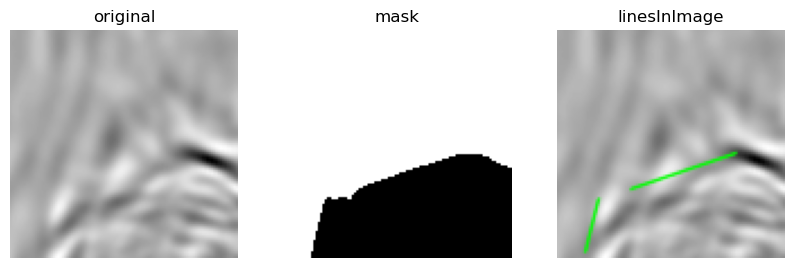

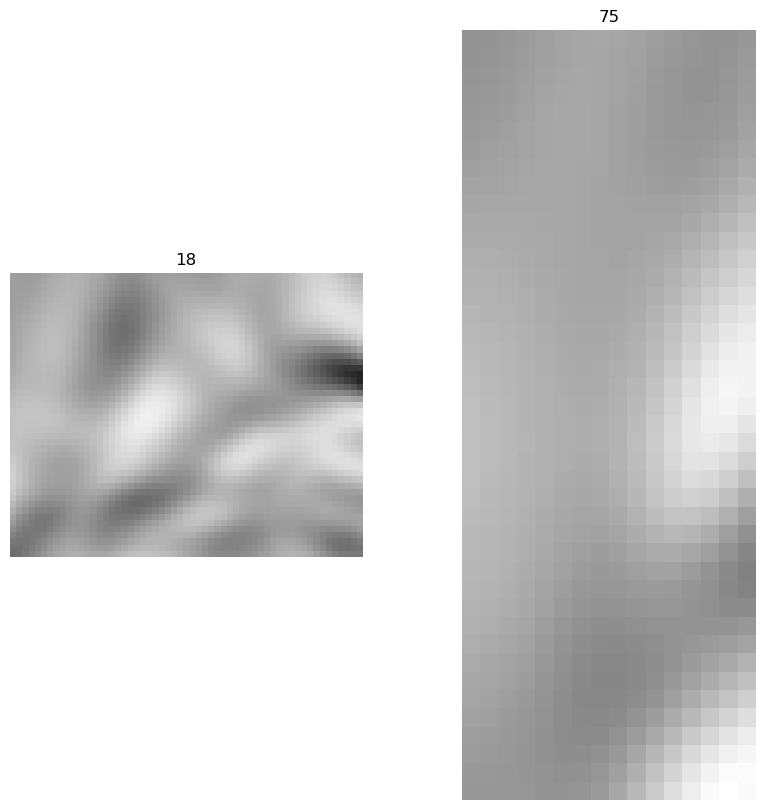

In [3]:
#sample_path="tgs_salt/1bd1c8c771.png"
sample_path="tgs_salt/0bdd44d530.png"
mask_path  ="tgs_salt/0bdd44d530Mask.png"
original = cv2.imread(sample_path)
mask     = cv2.imread(mask_path,0)
#sample_path="tgs_salt/0a1742c740.png"
patches, linesInImage = pm.probHough(mask, original, tresh = 20, minPoints=15, maxGap=5)
images = [original,mask, linesInImage]
titles = ["original","mask", "linesInImage"]
pm.showImages(images=images, imagesTitle=titles,size=(10,10)) 
pm.dispPatchesClass(patches)

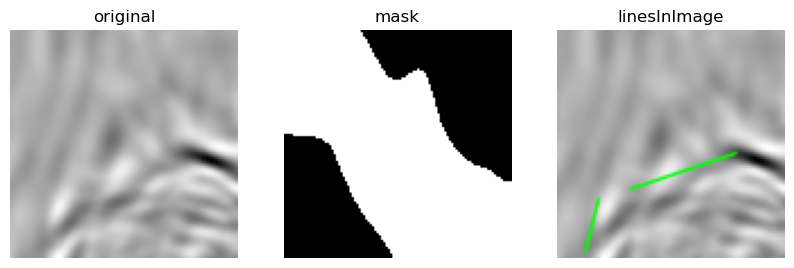

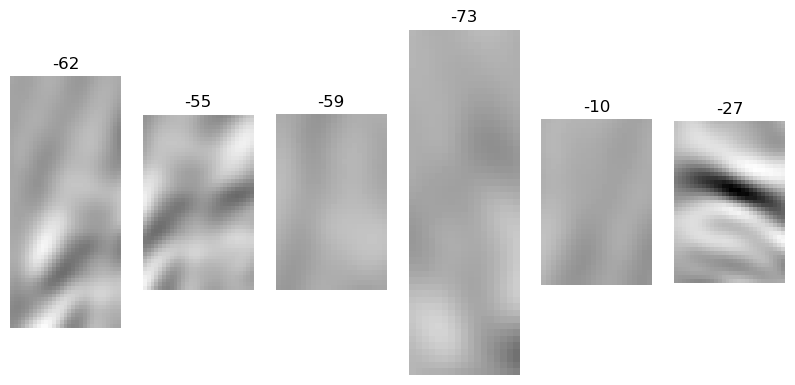

In [4]:
sample_path="tgs_salt/0bdd44d530.png"
mask_path  ="tgs_salt/0a1742c740Mask.png"

original = cv2.imread(sample_path)
mask = cv2.imread(mask_path,0)
patches, linesImage = pm.probHough(mask, original, tresh = 20, minPoints=10, maxGap=10)
images = [original,mask, linesInImage]
titles = ["original","mask", "linesInImage"]
pm.showImages(images=images, imagesTitle=titles,size=(10,10)) 
pm.dispPatchesClass(patches)

# Compara o tom de imagens através de seus histogramas


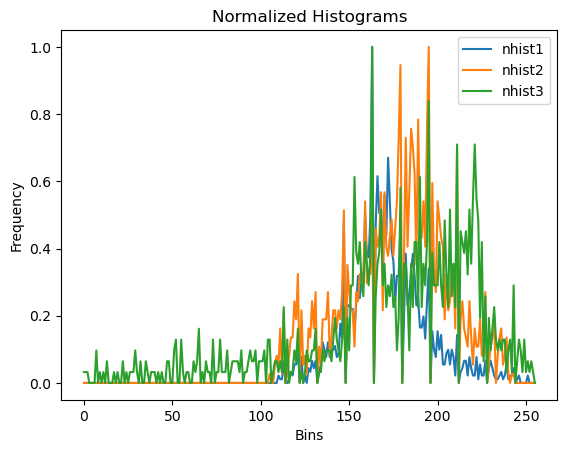

In [9]:
import matplotlib.pyplot as plt

plt.plot(hist[0], label='nhist1')
plt.plot(hist[1], label='nhist2')
plt.plot(hist[2], label='nhist3')
plt.title("Normalized Histograms")
plt.xlabel("Bins")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [17]:
import cv2
import numpy as np



Comparison:  1.0
Comparison:  0.7865356043091734
Comparison:  0.8951611436760402


In [21]:
images = patches
for patch in patches:
    i = patch.image
    # Calcular os histogramas
    h = (cv2.calcHist([i], [0], None, [256], [0,256]))
    # Normalizar os histogramas
    h = cv2.normalize(h, h, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
    hist.append(h)
    # Comparar os histogramas de cada imagem com 0
    comparison = cv2.compareHist(hist[0], h , cv2.HISTCMP_CORREL)
    print("Comparison: ", comparison)




Comparison:  0.04994917085498581
Comparison:  0.06940304817164436
Comparison:  -0.08220478900988398
Comparison:  -0.02190516166006185
Comparison:  -0.010449353690548254
Comparison:  -0.05260272227095319


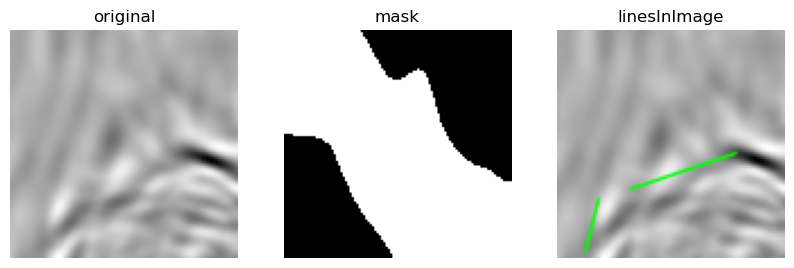

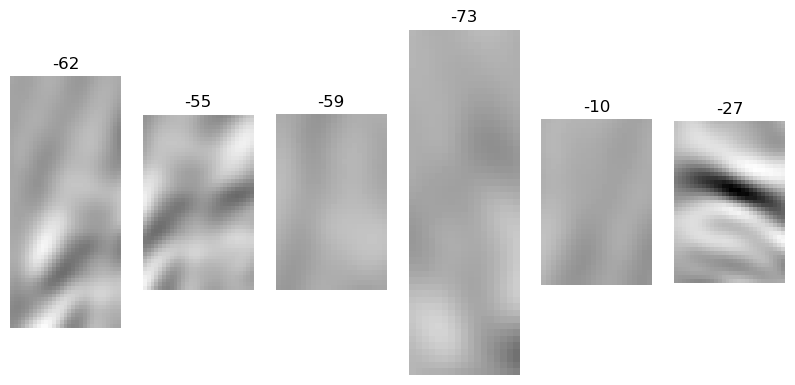

In [20]:
sample_path="tgs_salt/0bdd44d530.png"
mask_path  ="tgs_salt/0a1742c740Mask.png"

original = cv2.imread(sample_path)
mask = cv2.imread(mask_path,0)
patches, linesImage = pm.probHough(mask, original, tresh = 20, minPoints=10, maxGap=10)
images = [original,mask, linesInImage]
titles = ["original","mask", "linesInImage"]
pm.showImages(images=images, imagesTitle=titles,size=(10,10)) 
pm.dispPatchesClass(patches)

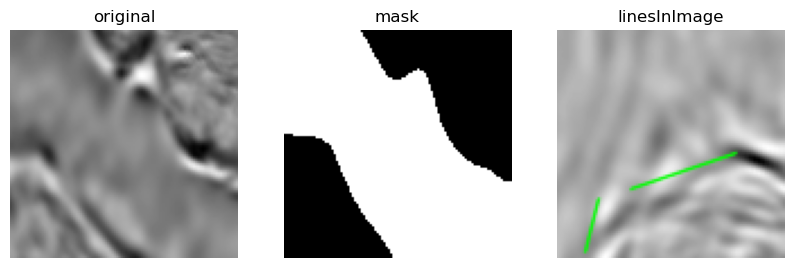

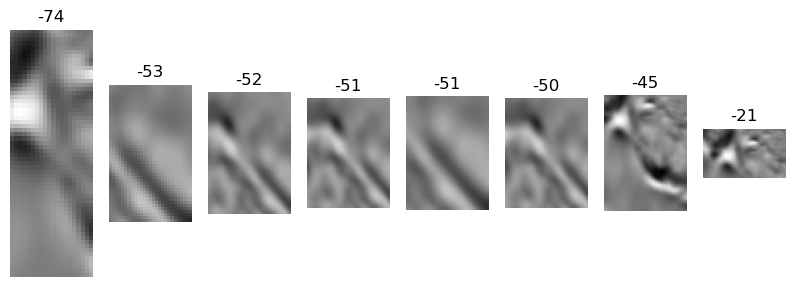

In [11]:
sample_path="tgs_salt/0a1742c740.png"
mask_path  ="tgs_salt/0a1742c740Mask.png"

original = cv2.imread(sample_path)
patches, linesP = pm.probHough(original, original, tresh = 20, minPoints=20, maxGap=10, sort=True)

images = [original,mask, linesInImage]
titles = ["original","mask", "linesInImage"]
pm.showImages(images=images, imagesTitle=titles,size=(10,10)) 
pm.dispPatchesClass(patches)


In [ ]:
#Desktop I3
TRAIN_CSV = r'D:\_0Luciano\_0PHD\datasets\tgs-salt\train1090.csv'
masksPath = r'D:\_0Luciano\_0PHD\datasets\tgs-salt\masks10-90'
imagesPath = r'D:\_0Luciano\_0PHD\datasets\tgs-salt\train\images'

""" #ES00004605
TRAIN_CSV = r'G:\_phd\dataset\tgs-salt\saltMaskOk.csv'
IMAGES_DIR = r'G:\_phd\dataset\tgs-salt\train\images'
MASK_DIR= r'G:\_phd\dataset\tgs-salt\train\masks'  """

df_train = pd.read_csv(TRAIN_CSV)
imageFilesList = df_train.iloc[0:100,0]
  
imagesList = pm.loadImages(imagesPath, imageFilesList)
masksList  = pm.loadImages(masksPath,  imageFilesList)
pm.showImages(imagesList)
pm.showImages(masksList)

In [ ]:
patchesDB = pm.buildPatchesDB(masksList, imagesList)

309


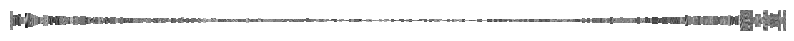

In [ ]:
print(len(patchesDB))
pm.dispArrayImages(patchesDB)

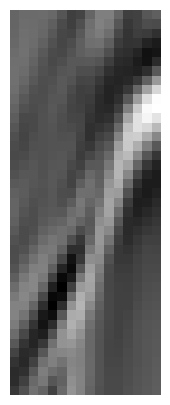

In [ ]:
from matplotlib import pyplot as plt

img = pm.searchNearestKey(patchesDB, 75)
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

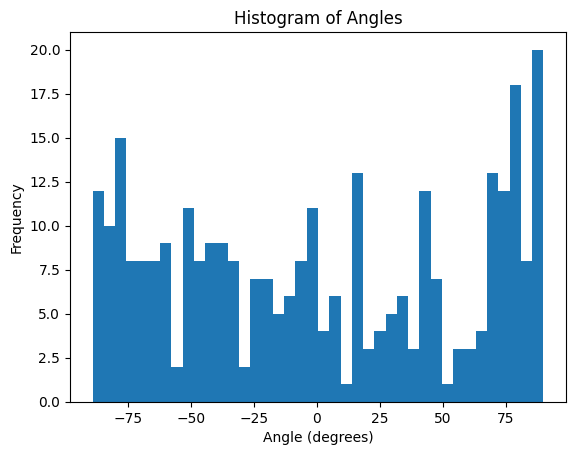

In [ ]:
# make histogram of angles
import numpy as np
angles = []


if patchesDB is not None:
    # use or each patch the angle
    for p in patchesDB:
        angles.append(p.angle)
    hist, bins = np.histogram(angles, bins=20)

# Plot the histogram
plt.hist(angles, bins=40)
plt.title("Histogram of Angles")
plt.xlabel("Angle (degrees)")
plt.ylabel("Frequency")
plt.show

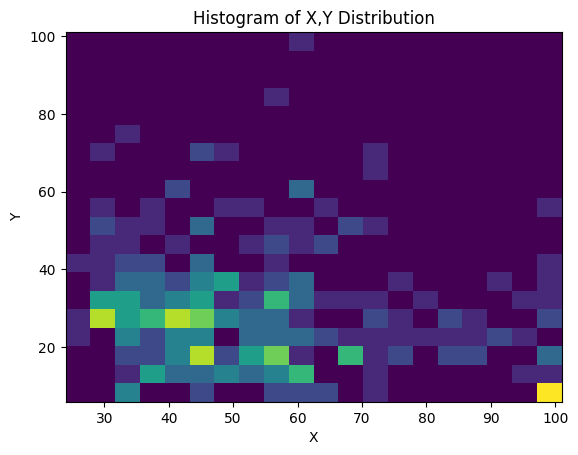

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some random data
xDist = []
yDist = []
if patchesDB is not None:
    # use or each patch the angle
    for p in patchesDB:
        x,y = p.image.shape[:2]
        xDist.append(x)
        yDist.append(y)


# Create a 2D histogram
plt.hist2d(xDist, yDist, bins=20)

# Add labels and title
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Histogram of X,Y Distribution")

# Show the plot
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

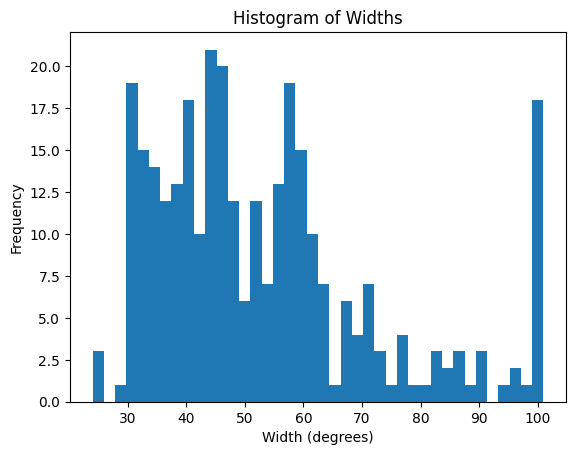

In [ ]:
hist, bins = np.histogram(xDist, bins=20)

# Plot the histogram
plt.hist(xDist, bins=40)
plt.title("Histogram of Widths")
plt.xlabel("Width (degrees)")
plt.ylabel("Frequency")
plt.show